# Deep Learning with Tabular Data
---

## Import Libraries

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *

## Load Data

In [5]:
path = untar_data(URLs.ADULT_SAMPLE)
path

PosixPath('/home/aman/.fastai/data/adult_sample')

In [6]:
path.ls()

[PosixPath('/home/aman/.fastai/data/adult_sample/adult.csv'),
 PosixPath('/home/aman/.fastai/data/adult_sample/models'),
 PosixPath('/home/aman/.fastai/data/adult_sample/export.pkl')]

In [7]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32074 non-null float64
marital-status    32561 non-null object
occupation        32049 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [9]:
y_var = 'salary'
cat_var = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_var = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
proc = [FillMissing, Categorify, Normalize]

In [10]:
test = TabularList.from_df(df.iloc[0:1000], path=path, cat_names=cat_var, cont_names=cont_var, procs=proc)

In [11]:
data = (TabularList.from_df(df, path=path, cat_names=cat_var,
                            cont_names=cont_var, procs=proc)
        .split_by_idx(range(0,1000))
        .label_from_df(cols=y_var)
        .add_test(test)
        .databunch())        

In [12]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,capital-gain,capital-loss,hours-per-week,target
Private,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,United-States,-0.8490,-0.1462,-0.2161,-0.0353,<50k
State-gov,Assoc-acdm,Married-civ-spouse,Other-service,Husband,White,Male,United-States,-0.4829,-0.1462,-0.2161,-0.4401,<50k
Private,HS-grad,Never-married,Other-service,Own-child,White,Male,United-States,-1.2882,-0.1462,-0.2161,-0.0353,<50k
Private,HS-grad,Never-married,Prof-specialty,Not-in-family,White,Male,Canada,-1.1418,-0.1462,-0.2161,-0.0353,<50k
Private,9th,Married-civ-spouse,Other-service,Wife,Black,Female,United-States,0.0296,0.3157,-0.2161,-0.5210,<50k


In [13]:
data.c, data.classes

(2, ['<50k', '>=50k'])

## Train Tabular Learner

In [20]:
learner = tabular_learner(data, layers=[100,200], metrics=accuracy)

> /mnt/Workspace/AI/deep-learning/fastai-fork/fastai/tabular/data.py(174)tabular_learner()
-> emb_szs = data.get_emb_szs(ifnone(emb_szs, {}))


(Pdb)  c


In [16]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


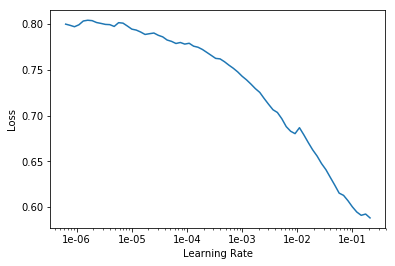

In [18]:
learner.recorder.plot(skip_end=10)

In [19]:
lr = 1e-2

In [20]:
learner.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,accuracy,time
1,0.348316,0.346674,0.827000,00:07
2,0.338224,0.350449,0.827000,00:07
3,0.322416,0.327757,0.838000,00:07
4,0.312903,0.328624,0.847000,00:07


In [26]:
learner.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,accuracy,time
1,0.324850,0.335216,0.835000,00:06
2,0.325895,0.345550,0.829000,00:07
3,0.315108,0.332843,0.836000,00:07
4,0.299220,0.331428,0.839000,00:08


## Inference

In [27]:
learner.show_results(rows=10)

workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,capital-gain,capital-loss,hours-per-week,target,prediction
Private,Assoc-acdm,Married-civ-spouse,#na#,Wife,White,Female,United-States,0.7617,-0.1462,4.5099,-0.0353,>=50k,>=50k
Private,Masters,Divorced,Exec-managerial,Not-in-family,White,Male,United-States,0.3956,1.2783,-0.2161,0.3696,>=50k,>=50k
Private,HS-grad,Divorced,#na#,Unmarried,Black,Female,United-States,-0.0436,-0.1462,-0.2161,-0.6830,<50k,<50k
Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,United-States,-0.0436,-0.1462,-0.2161,-0.0353,>=50k,>=50k
Self-emp-not-inc,7th-8th,Married-civ-spouse,Other-service,Wife,Black,Female,United-States,0.2492,-0.1462,-0.2161,0.7744,<50k,<50k
Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,United-States,-1.3615,-0.1462,-0.2161,-2.0593,<50k,<50k
Private,Some-college,Divorced,#na#,Other-relative,White,Male,United-States,0.7617,-0.1462,-0.2161,-0.4401,<50k,<50k
Private,11th,Married-civ-spouse,#na#,Husband,White,Male,United-States,-0.1169,-0.1462,-0.2161,-0.0353,<50k,<50k
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0.5420,-0.1462,-0.2161,-0.0353,>=50k,<50k
Self-emp-inc,HS-grad,Married-civ-spouse,#na#,Husband,White,Male,?,-0.1901,13.3941,-0.2161,0.7744,>=50k,>=50k


In [28]:
interp = learner.interpret()

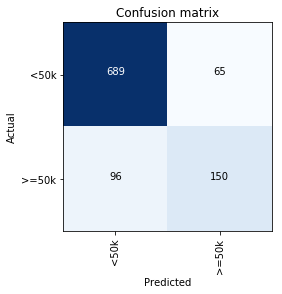

In [29]:
interp.plot_confusion_matrix()